Do not attempt to rerun the following code, as I need to go into the relaxation and math package to change functions used to compare speed.

In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


The following code was done with FAST equation of motion

Plot initial grid


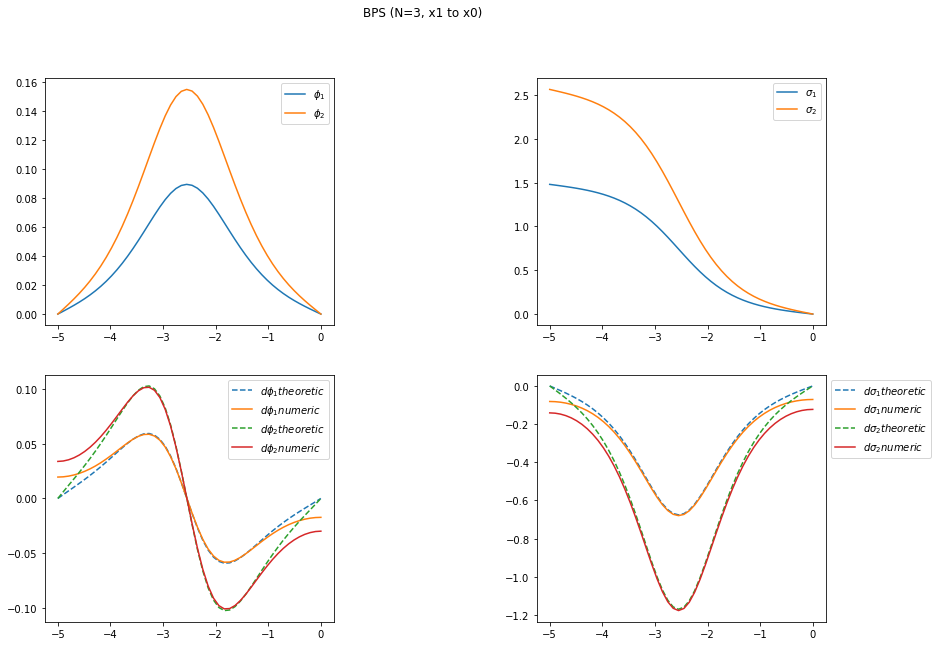

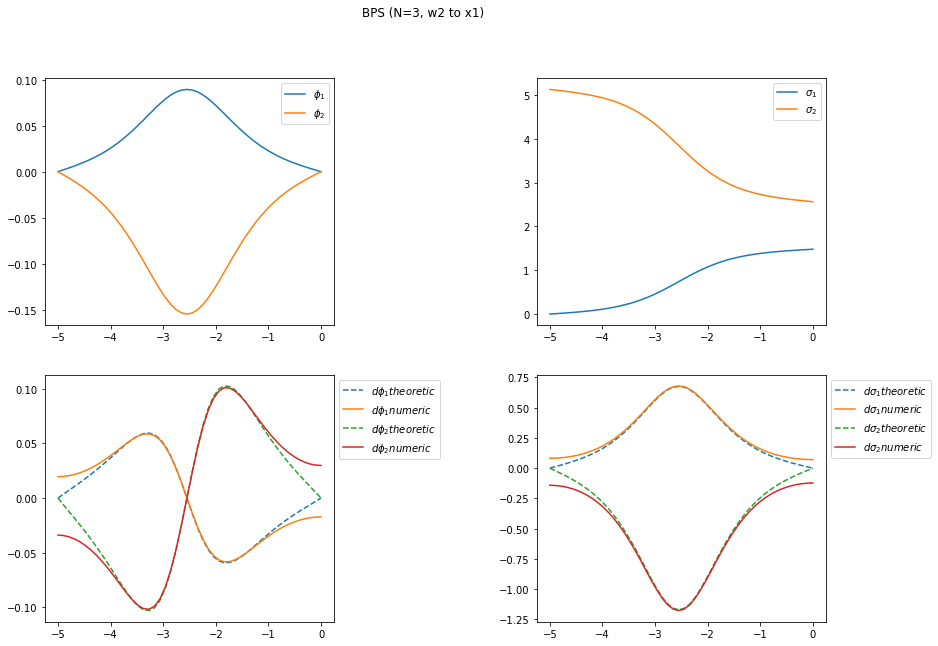

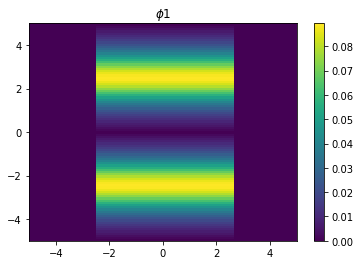

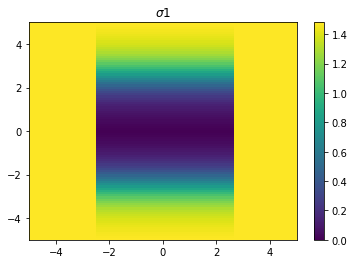

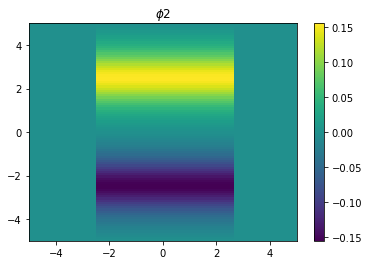

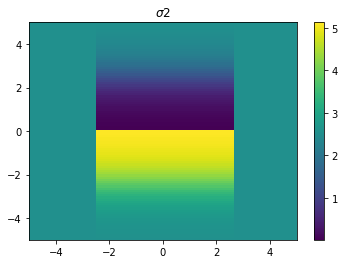

loop = 50 error = 0.0008516248574968311


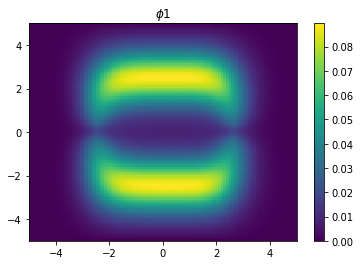

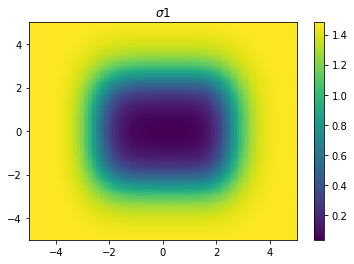

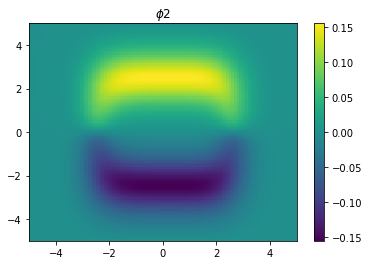

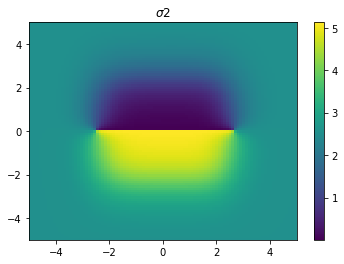

loop = 100 error = 0.0005718854400957454


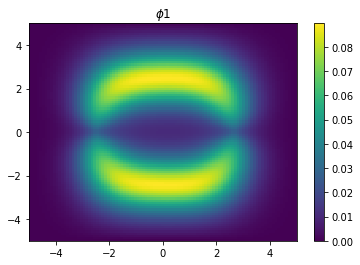

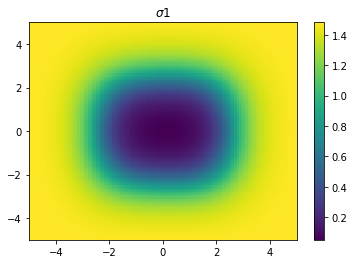

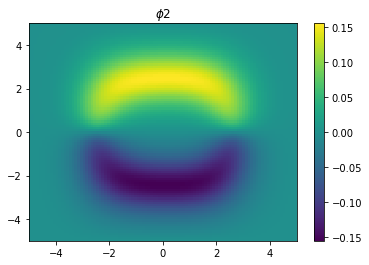

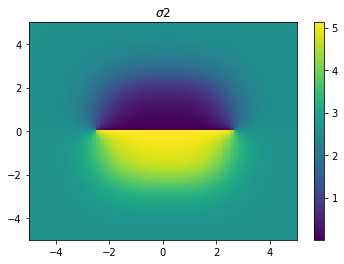

loop = 150 error = 0.0004993466895264934


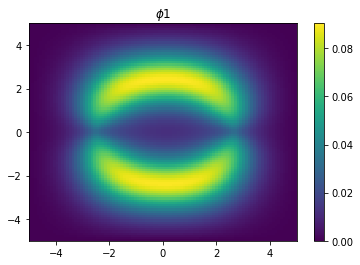

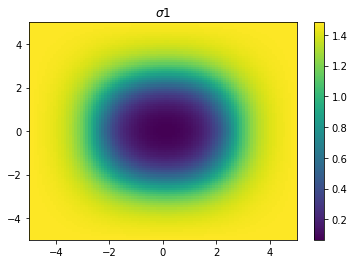

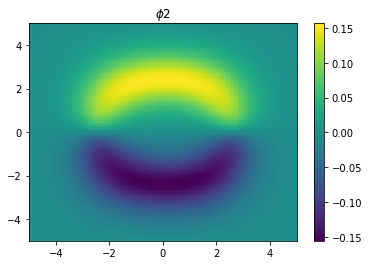

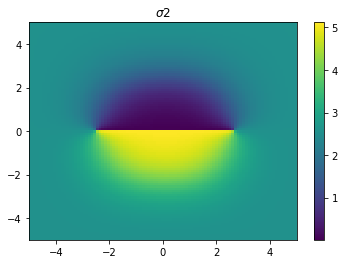

loop = 200 error = 0.00047407353531292245


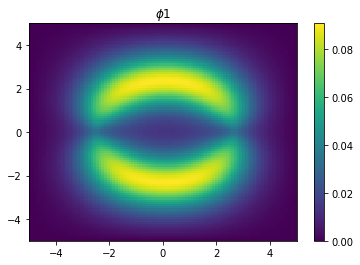

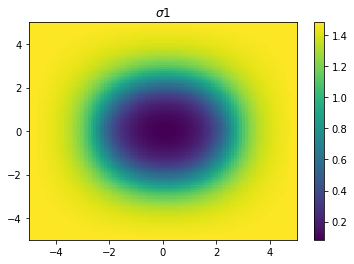

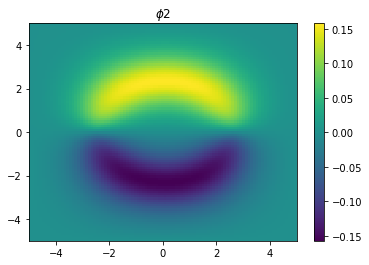

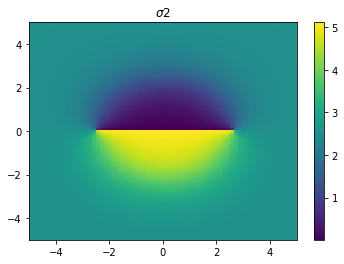

loop = 250 error = 0.00045134625671023584


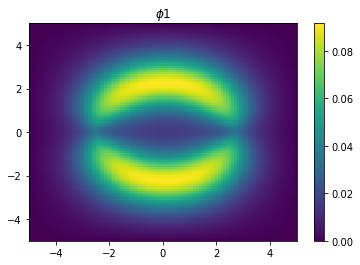

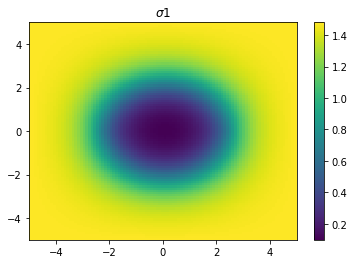

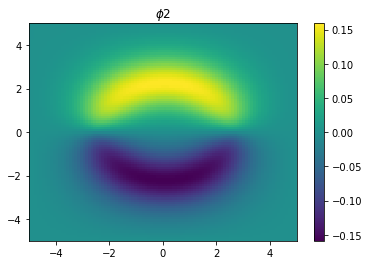

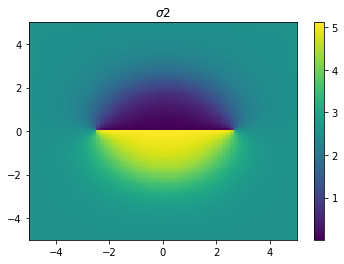

loop = 300 error = 0.0004245442925070373


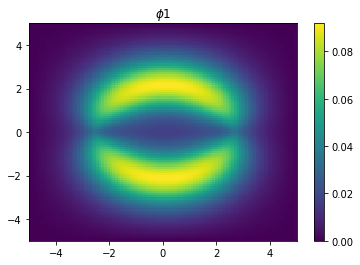

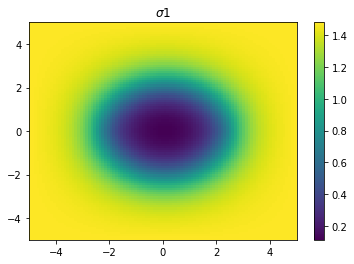

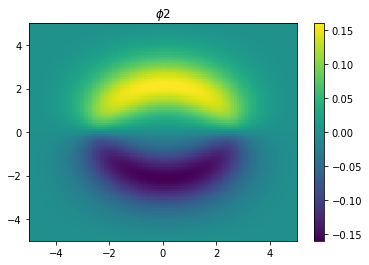

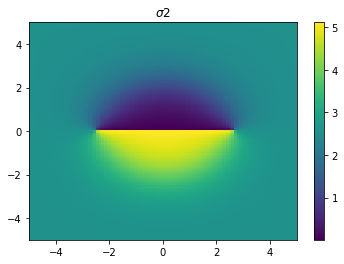

loop = 350 error = 0.00039656322372912215


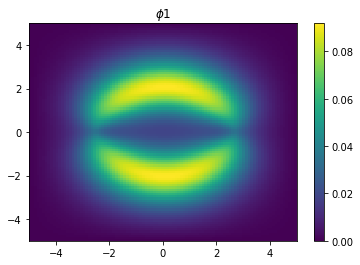

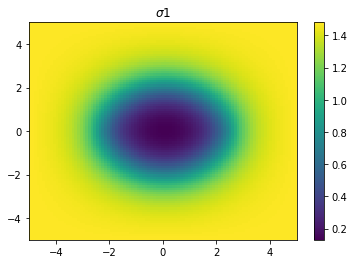

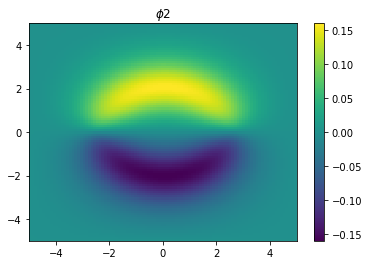

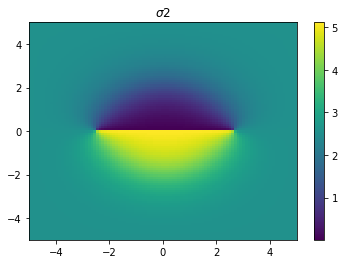

loop = 400 error = 0.00036865211375602974


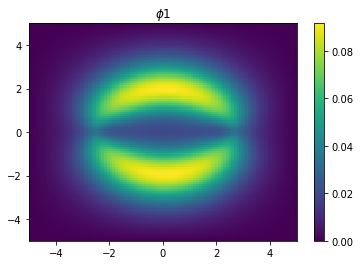

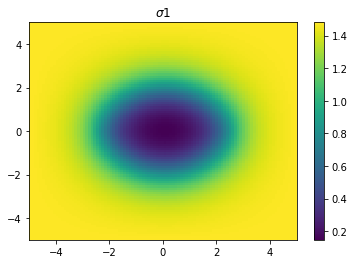

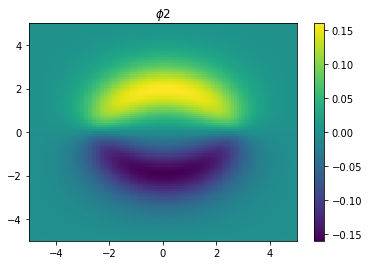

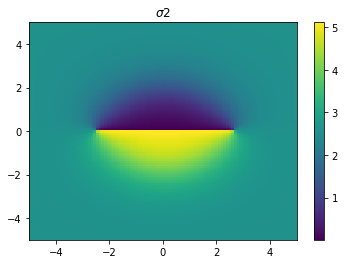

359.2887387275696


In [2]:
from Solver_Full_Grid import Solver_Full_Grid
import time
start = time.time()
sol = Solver_Full_Grid(N=3,charge_arg="w2",bound_arg="x1",L=10,w=10,h=0.1,R=5,tol=1e-30,max_loop=400,x0="BPS",diagnose=True)
end = time.time()
print(end - start)

So, it took the fast code 6 minutes (360 seconds) to make this computation.

Just for completeness, let's plot the result.


Attributes:
N = 3
charge_arg = w2
bound_arg = x1
max loop = 400
tolerance = 1e-30
L = 10
w = 10
h = 0.1
R = 5
loop = 401
error = 0.00036809806153492475
energy = 90.84404587915614



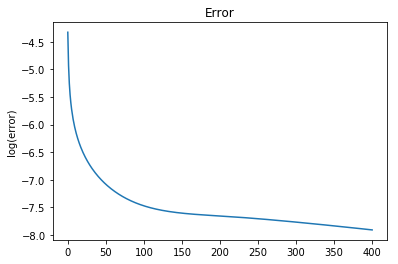

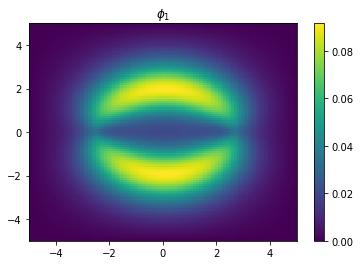

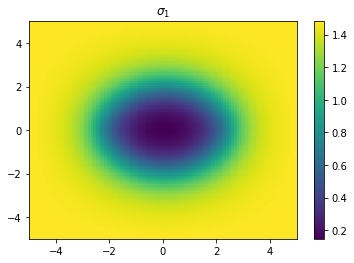

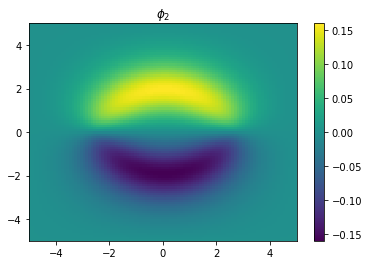

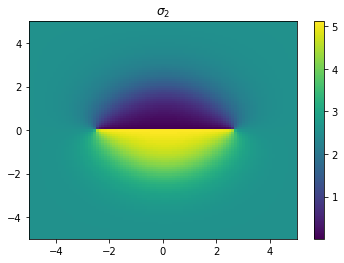

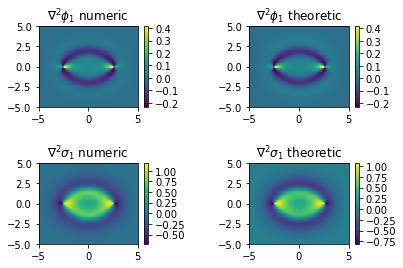

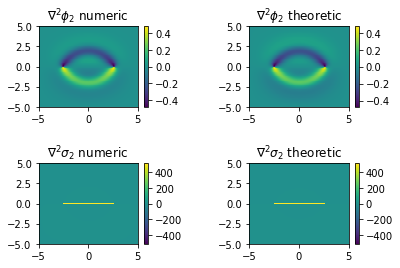

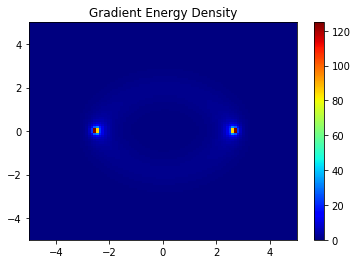

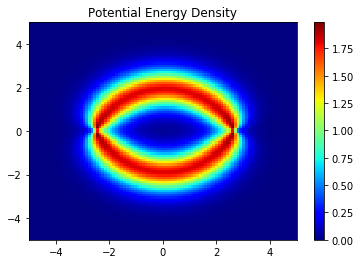

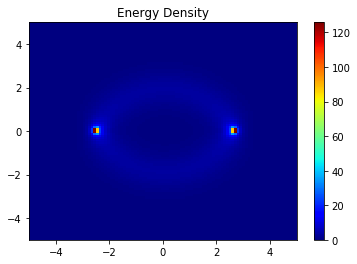

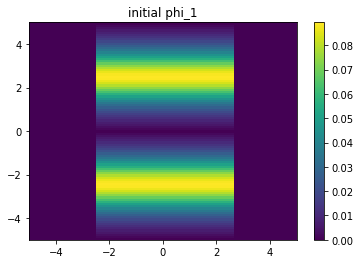

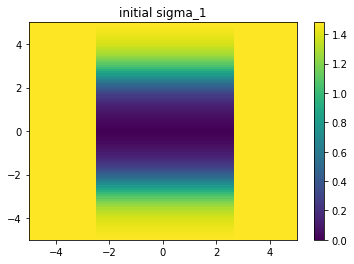

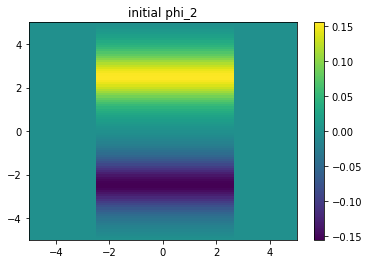

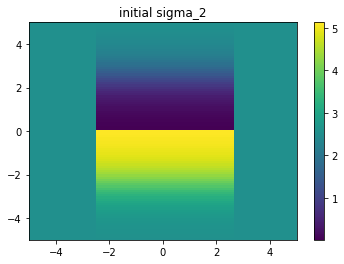

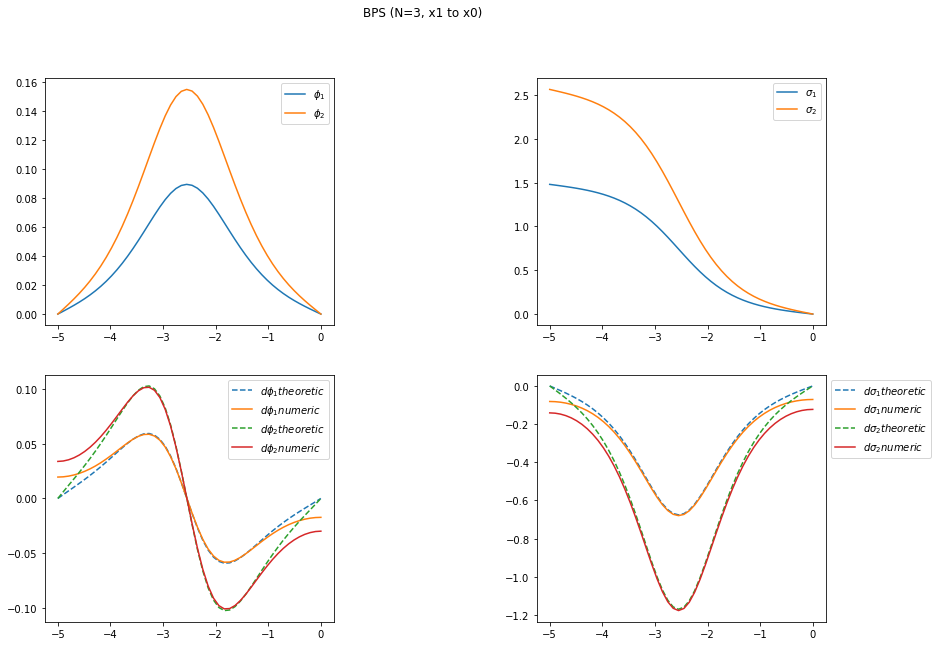

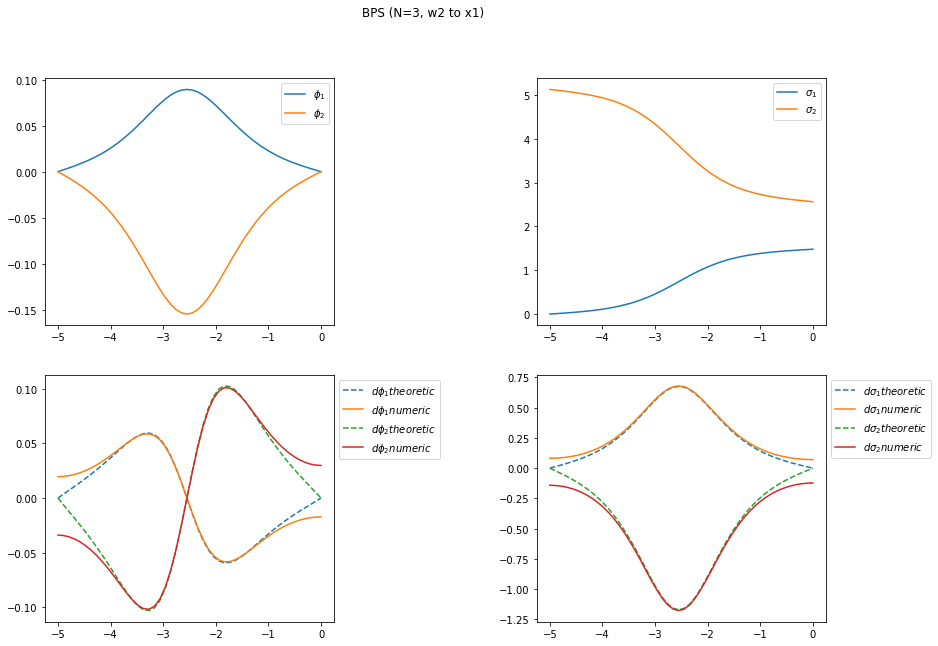

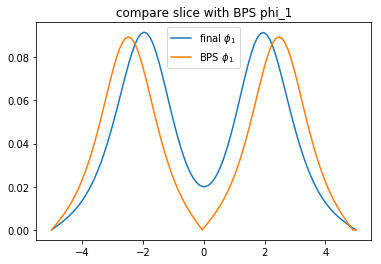

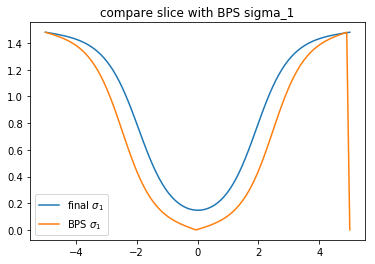

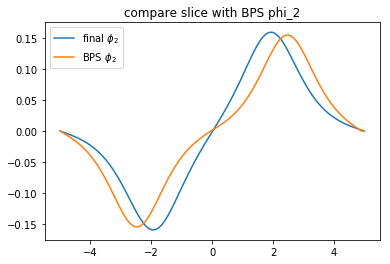

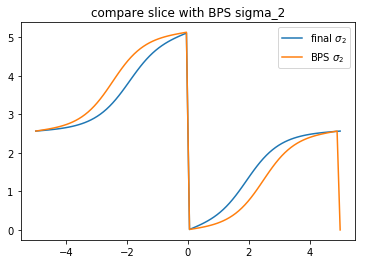

In [3]:
sol.display_all()

I temporarily removed the fast equation of motion in the relaxation code. Let's see how much time that takes. (Note: DO NOT rerun the following.

Plot initial grid


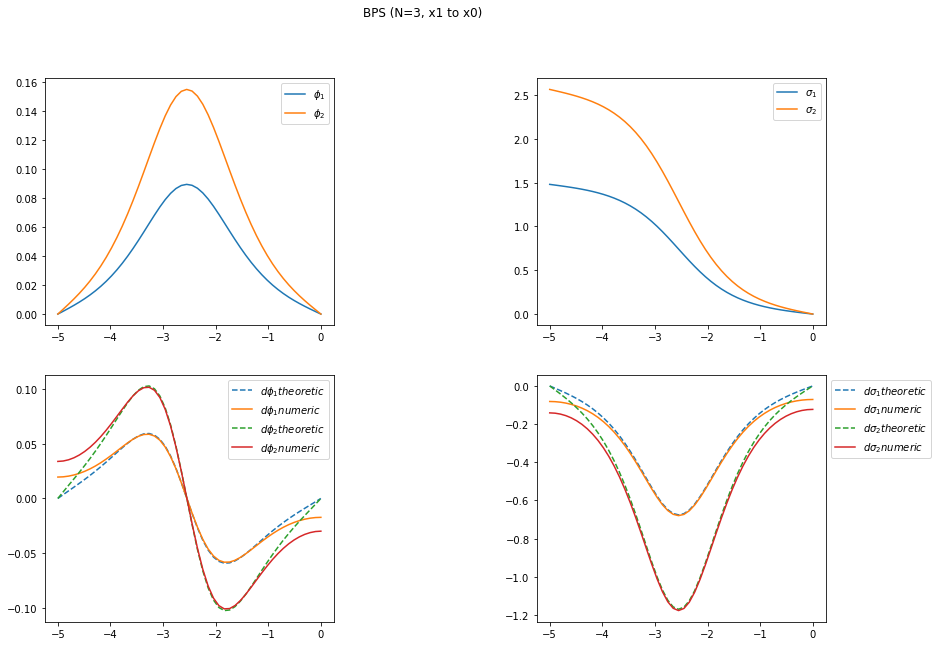

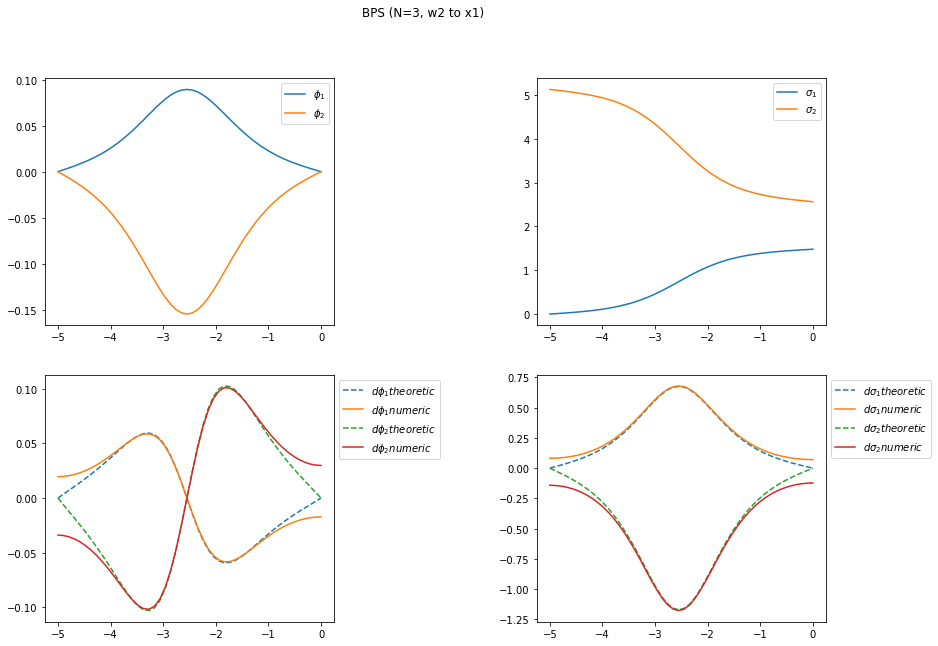

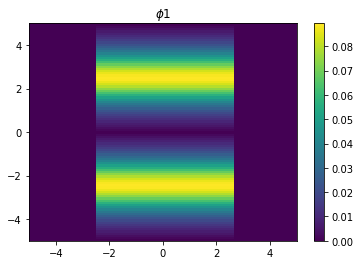

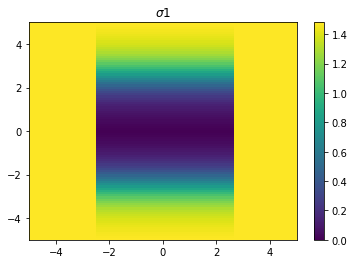

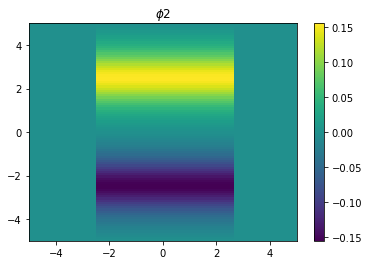

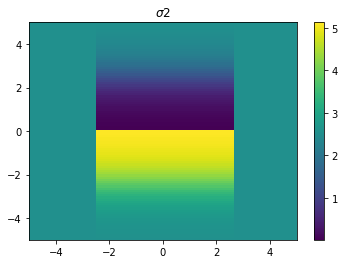

loop = 50 error = 0.0008516248574968314


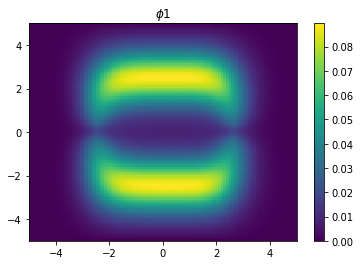

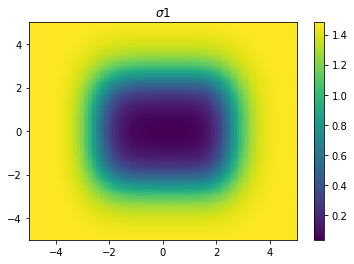

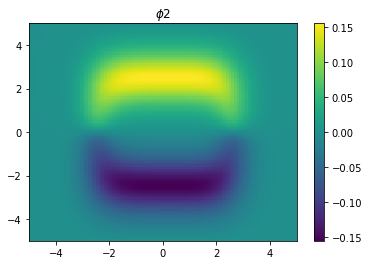

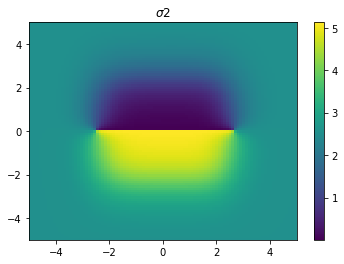

loop = 100 error = 0.0005718854400957454


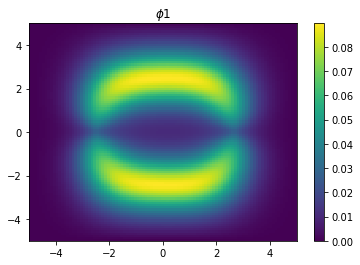

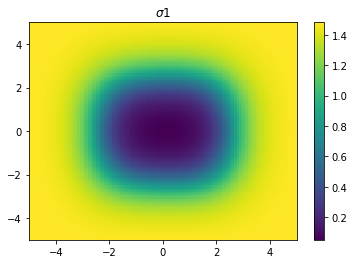

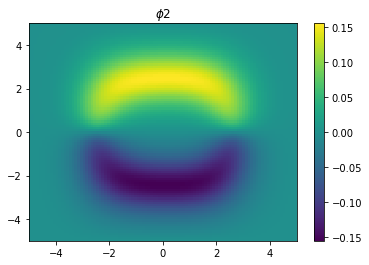

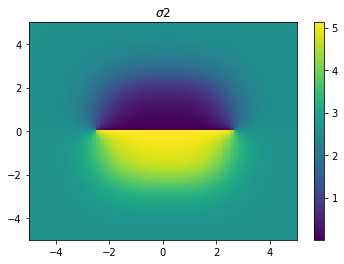

loop = 150 error = 0.000499346689526493


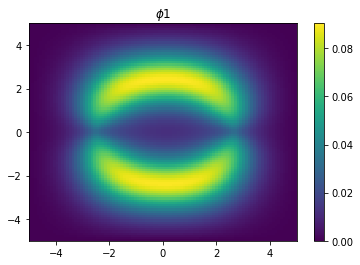

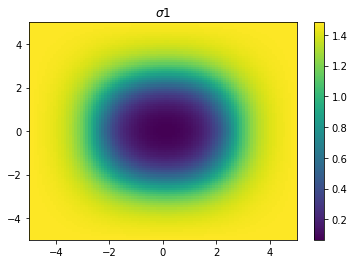

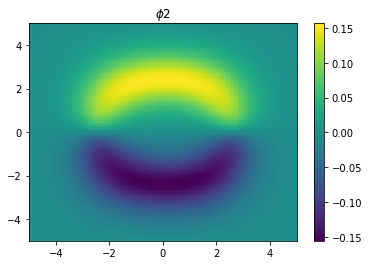

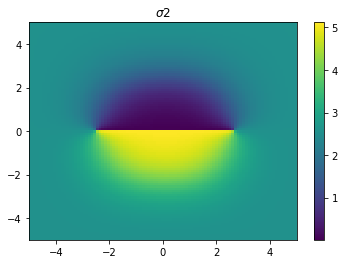

loop = 200 error = 0.0004740735353129222


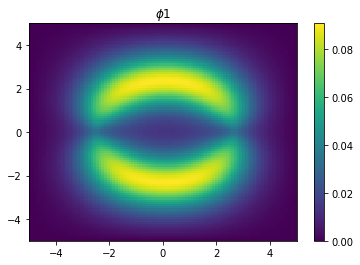

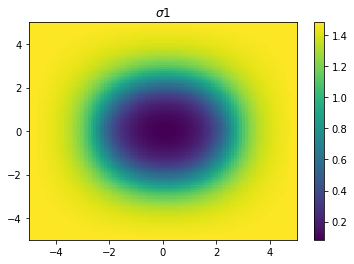

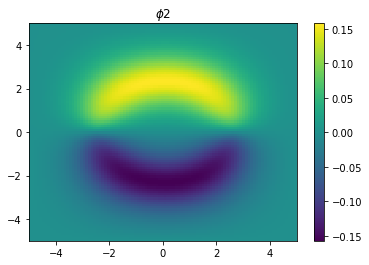

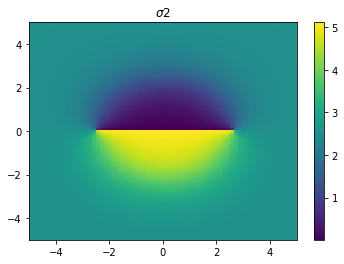

loop = 250 error = 0.0004513462567102367


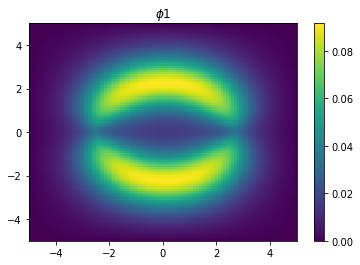

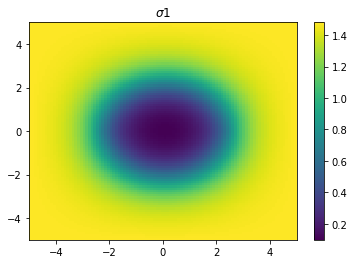

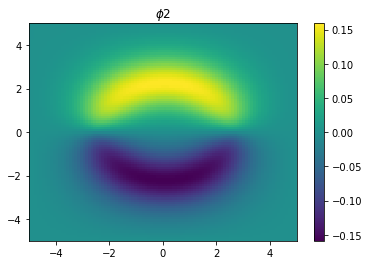

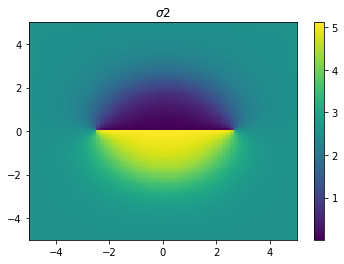

loop = 300 error = 0.0004245442925070375


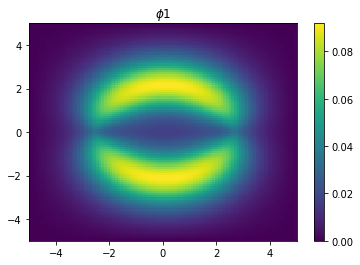

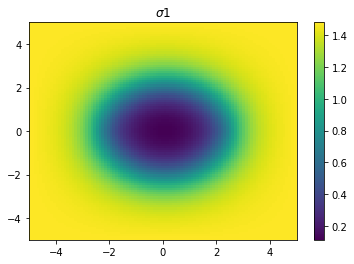

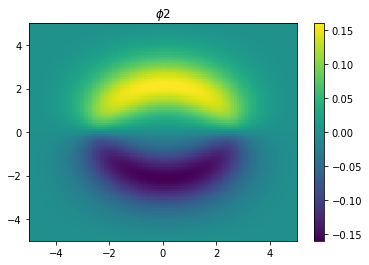

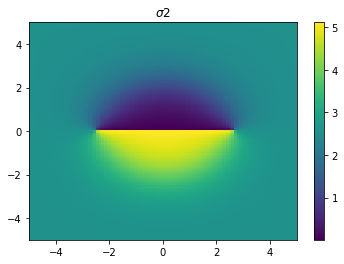

loop = 350 error = 0.0003965632237291226


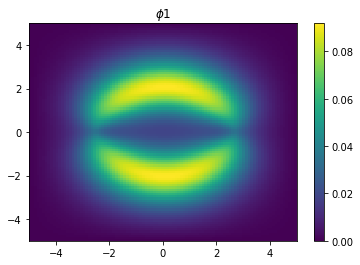

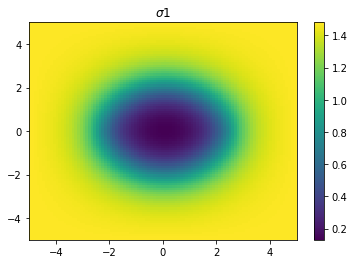

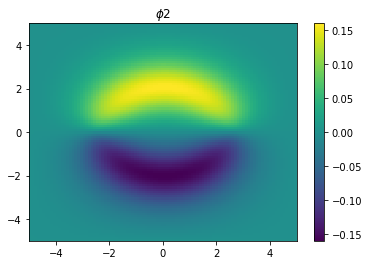

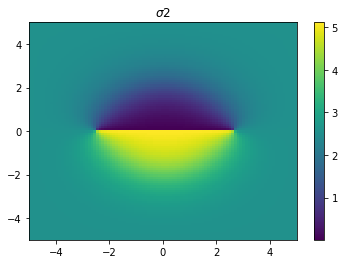

loop = 400 error = 0.0003686521137560316


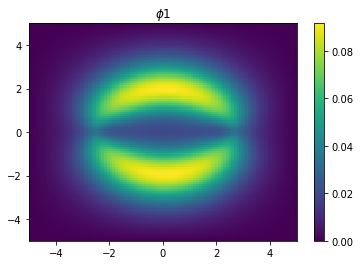

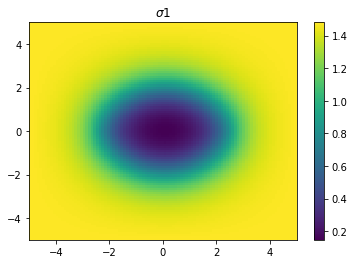

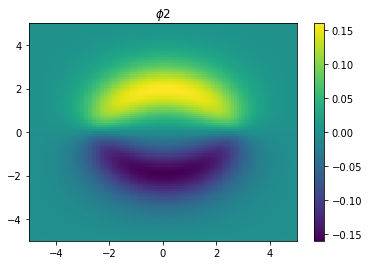

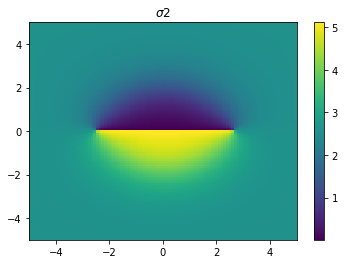

519.4413352012634


In [2]:
from Solver_Full_Grid import Solver_Full_Grid
import time
start = time.time()
sol2 = Solver_Full_Grid(N=3,charge_arg="w2",bound_arg="x1",L=10,w=10,h=0.1,R=5,tol=1e-30,max_loop=400,x0="BPS",diagnose=True)
end = time.time()
print(end - start)

The standard equation of motion took 519 seconds. This means, for N=3(more for higher N), the improvement is a factor of 359/519=0.7 times faster.

Display detail result (especially to compare energy) to make sure the fast equation of motion is correct


Attributes:
N = 3
charge_arg = w2
bound_arg = x1
max loop = 400
tolerance = 1e-30
L = 10
w = 10
h = 0.1
R = 5
loop = 401
error = 0.0003680980615349246
energy = 90.84404587915614



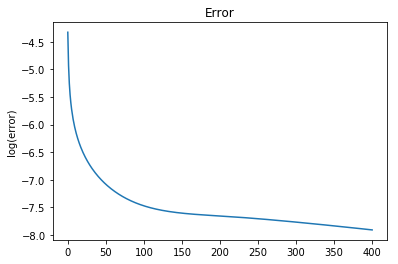

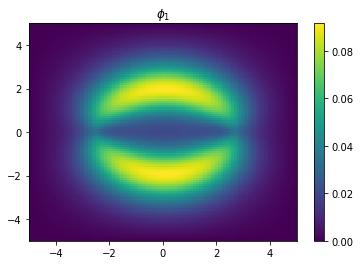

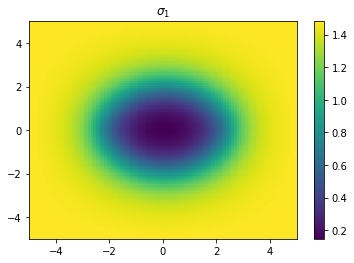

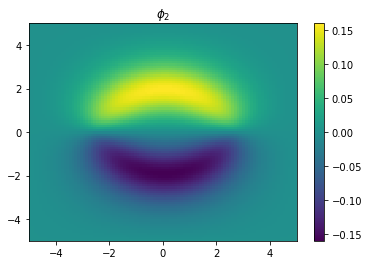

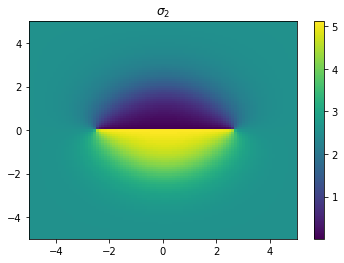

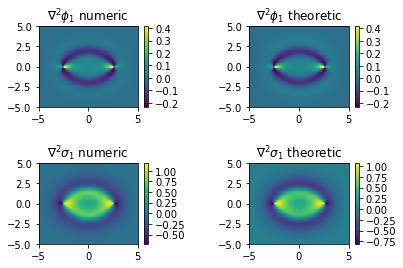

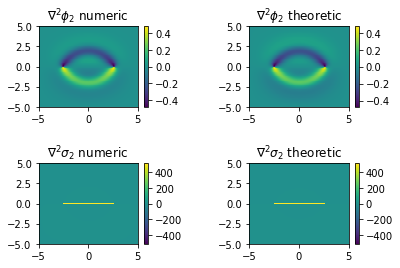

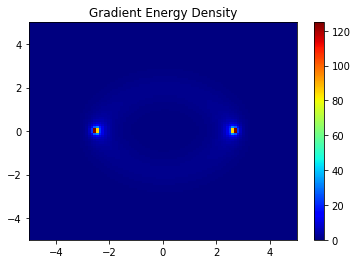

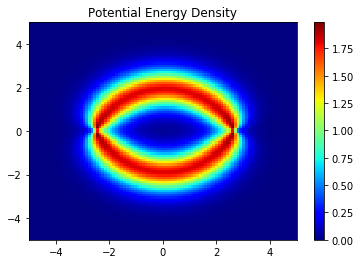

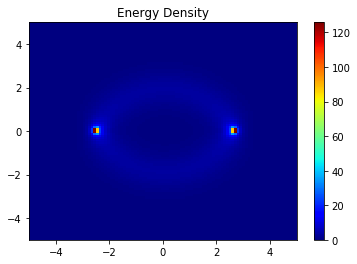

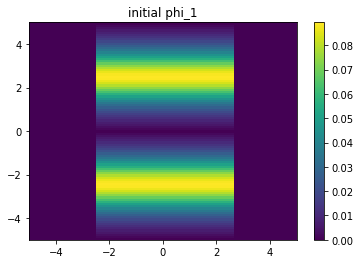

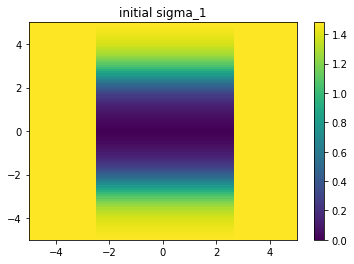

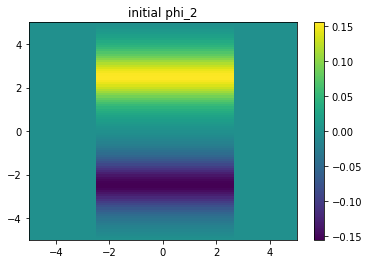

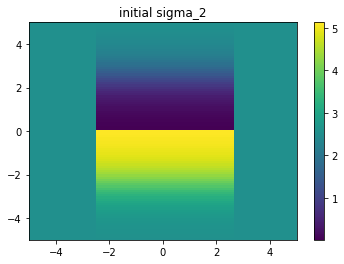

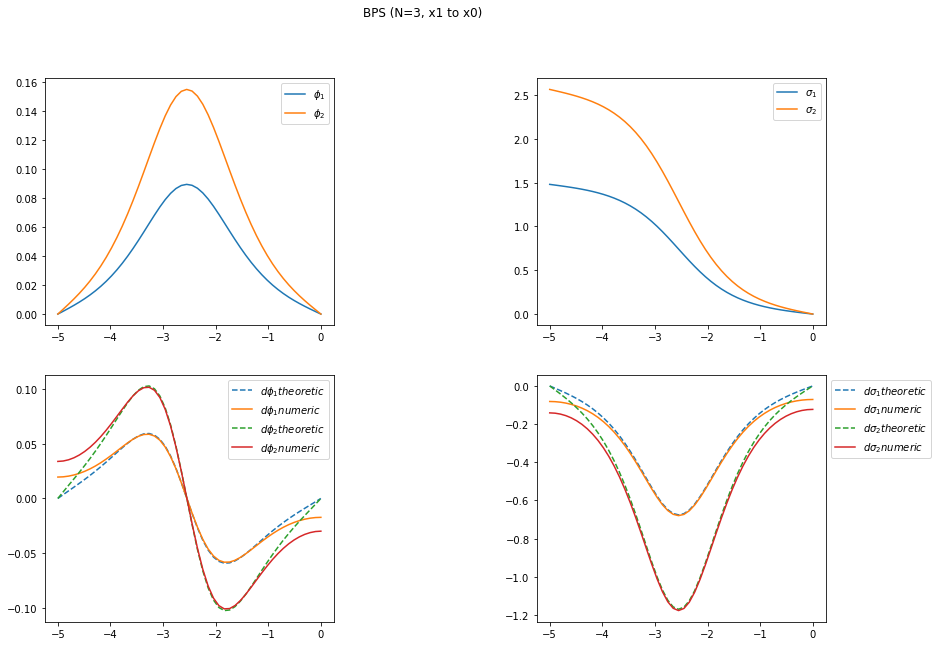

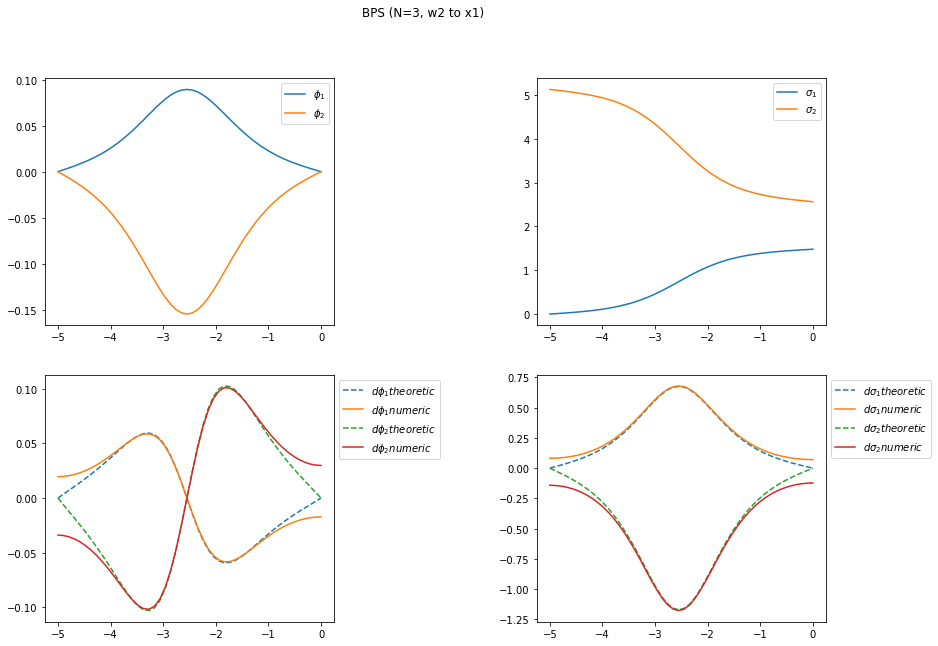

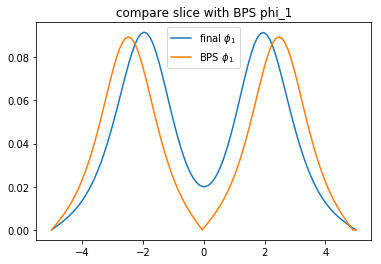

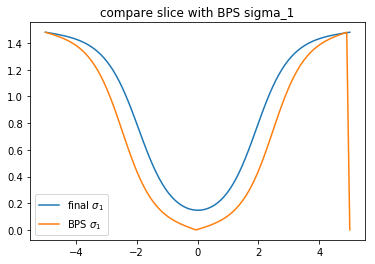

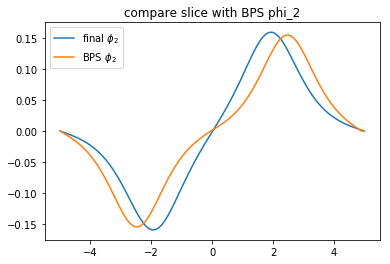

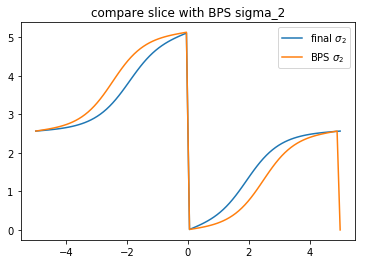

In [3]:
sol2.display_all()

And the answer is that the energy are EXACTLY the same!! Time to use the fast equation of motion permanently.

Next, I changed the equation of motion to "fast_optimized", which optimizes it using Numpy. Let's see how it fares this time.

Plot initial grid


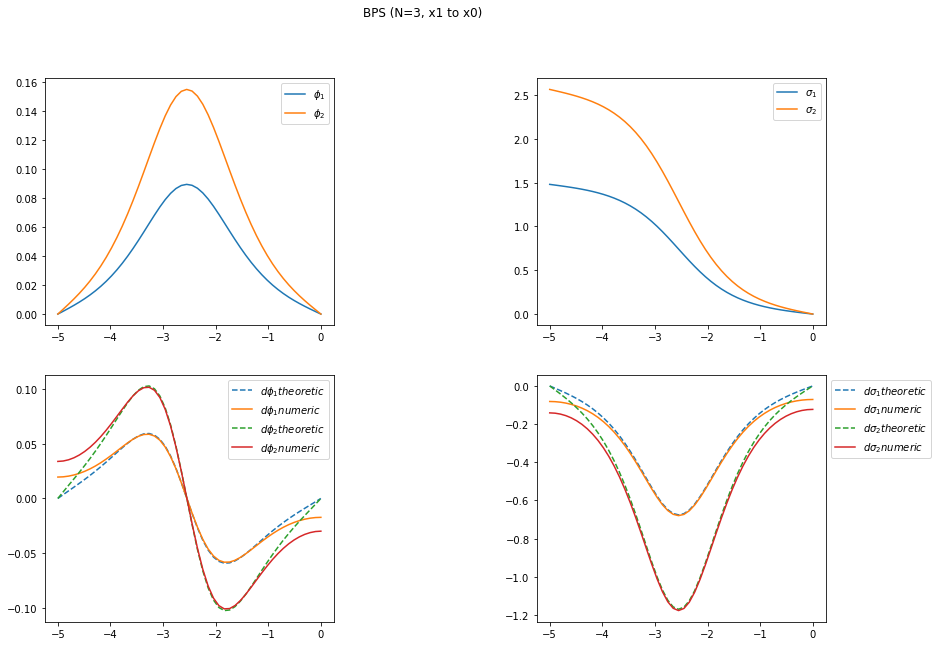

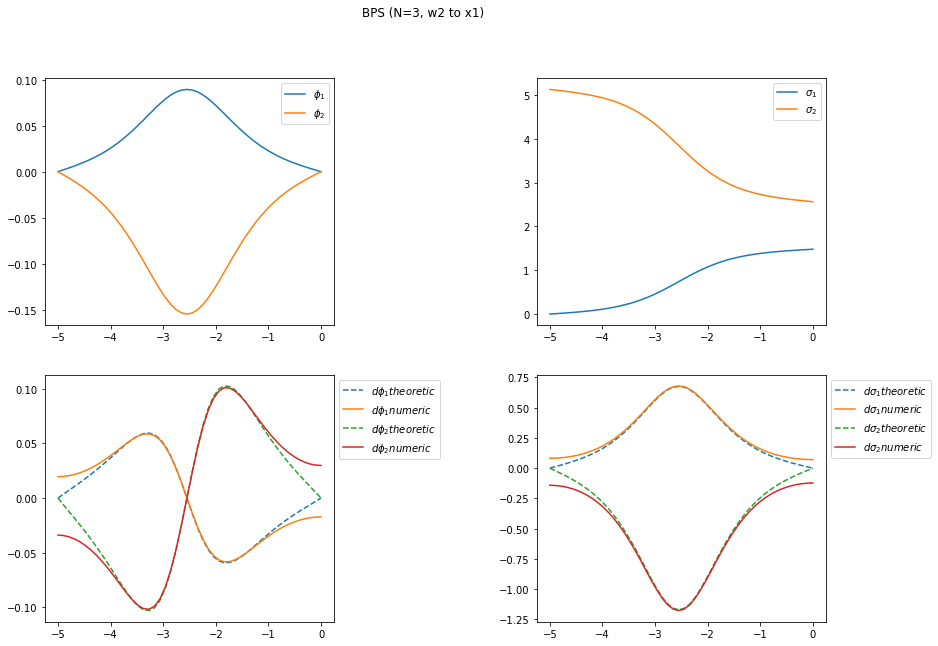

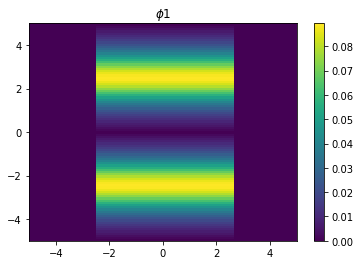

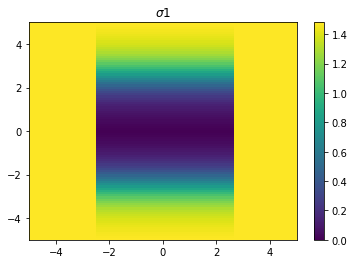

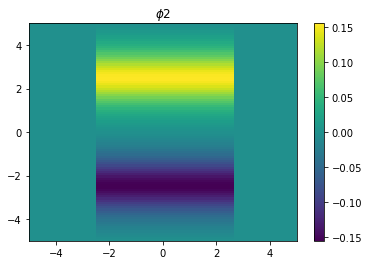

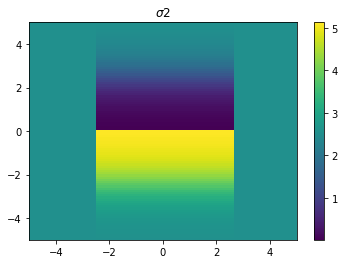

loop = 50 error = 0.0008516248574968311


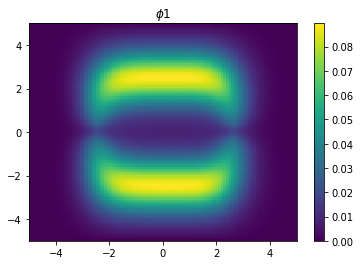

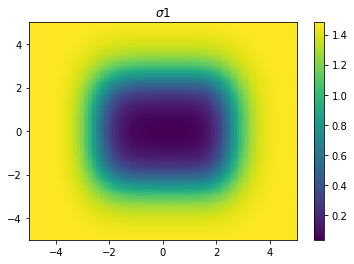

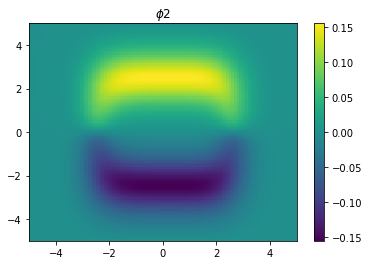

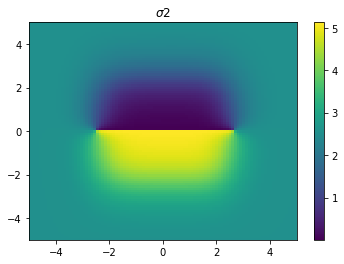

loop = 100 error = 0.0005718854400957454


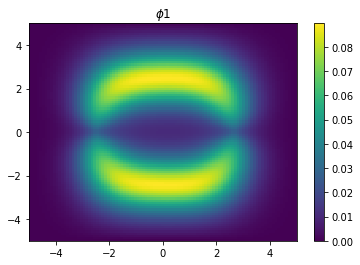

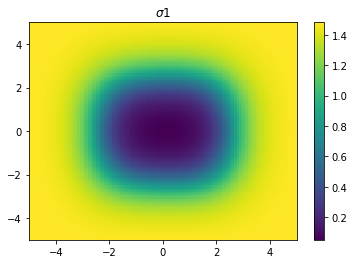

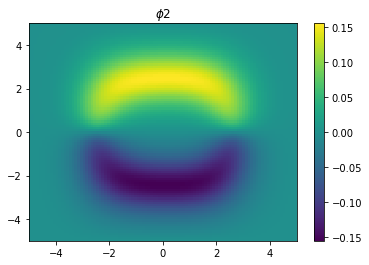

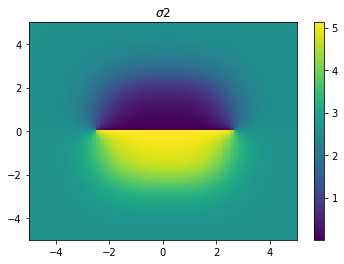

loop = 150 error = 0.0004993466895264934


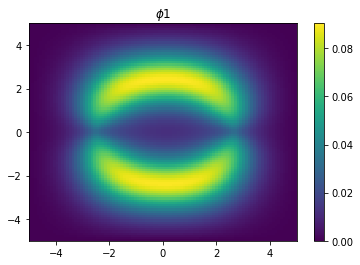

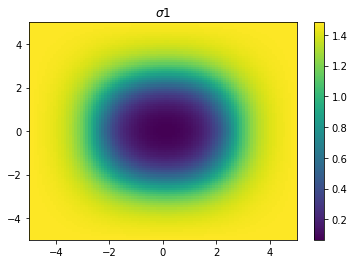

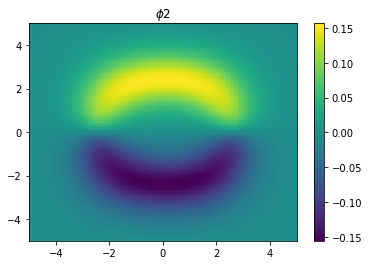

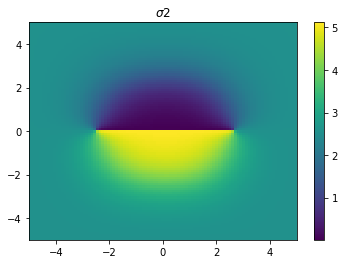

loop = 200 error = 0.00047407353531292245


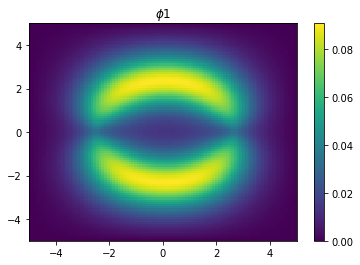

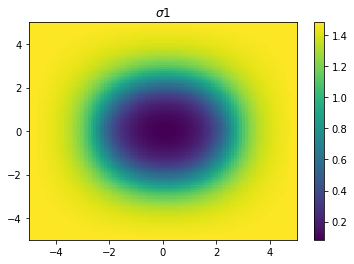

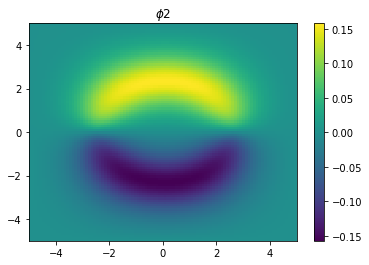

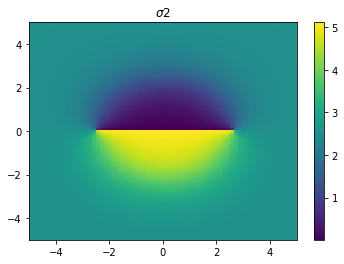

loop = 250 error = 0.00045134625671023584


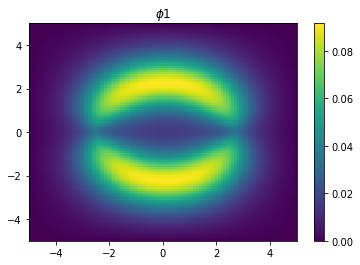

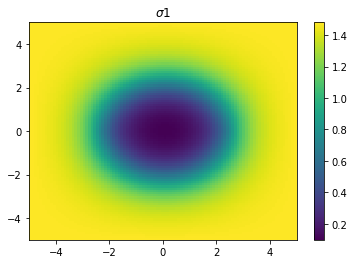

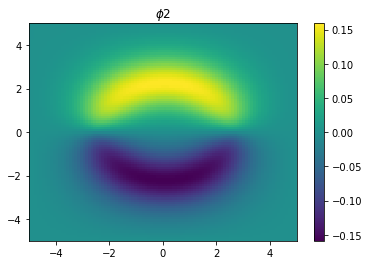

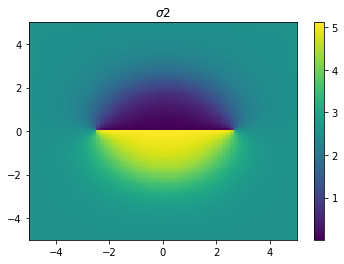

loop = 300 error = 0.0004245442925070373


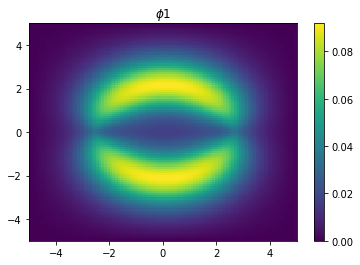

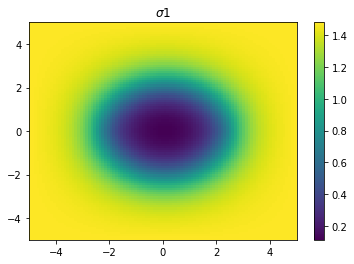

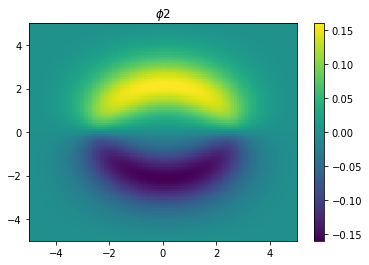

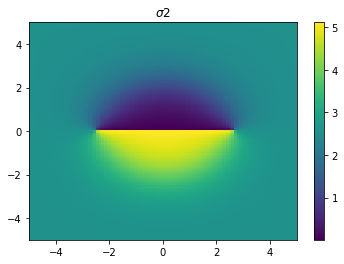

loop = 350 error = 0.00039656322372912215


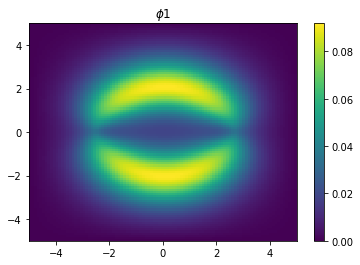

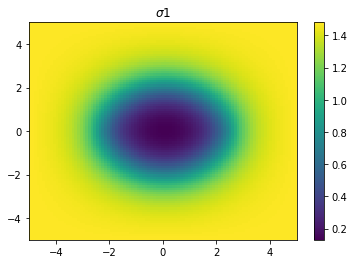

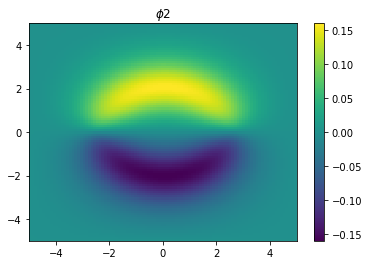

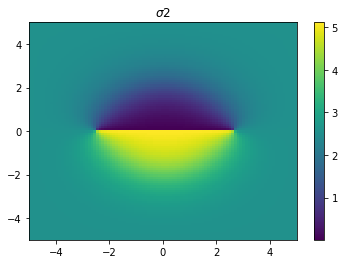

loop = 400 error = 0.00036865211375602974


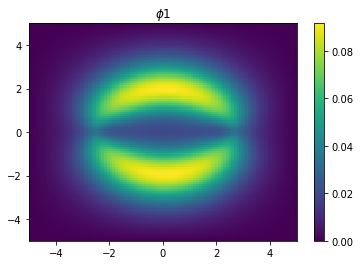

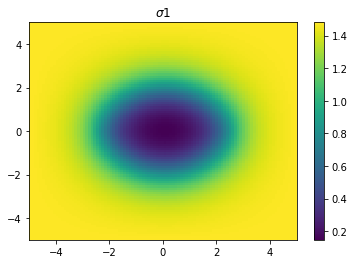

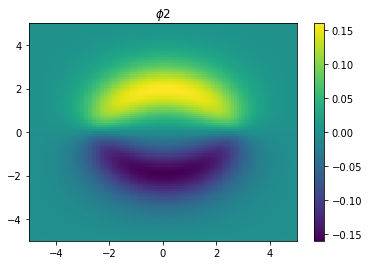

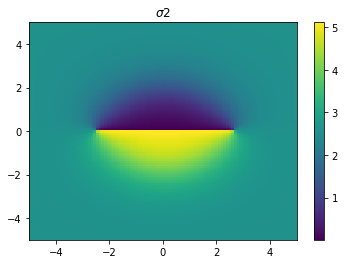

41.32971692085266


In [2]:
from Solver_Full_Grid import Solver_Full_Grid
import time
start = time.time()
sol = Solver_Full_Grid(N=3,charge_arg="w2",bound_arg="x1",L=10,w=10,h=0.1,R=5,tol=1e-30,max_loop=400,x0="BPS",diagnose=True)
end = time.time()
print(end - start)

Now the code is so fast that it only took 41.3 seconds! Compared to the original 359.2, this is 359.2/41.3 = 8.7 times faster!!
I estimated elsewhere using an example that this will be 255 times faster by the time we get to N=10.

Now just to be sure the result is still the same, we print error and energy.


Attributes:
N = 3
charge_arg = w2
bound_arg = x1
max loop = 400
tolerance = 1e-30
L = 10
w = 10
h = 0.1
R = 5
loop = 401
error = 0.00036809806153492475
energy = 90.84404587915614



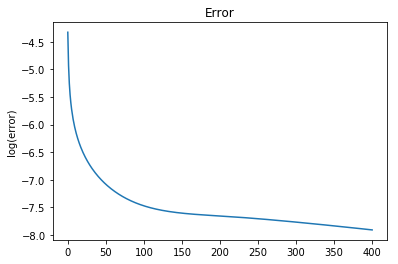

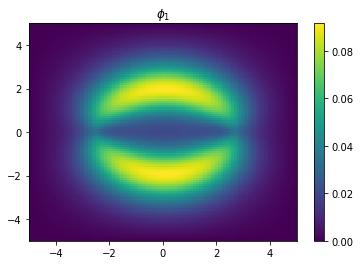

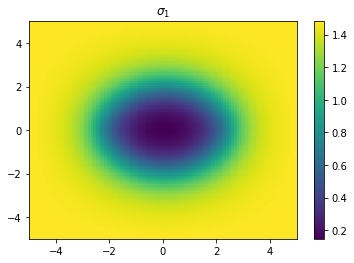

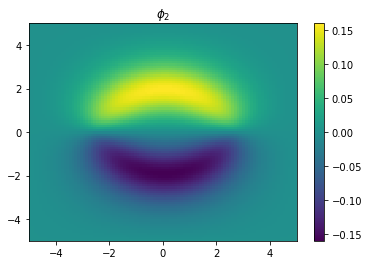

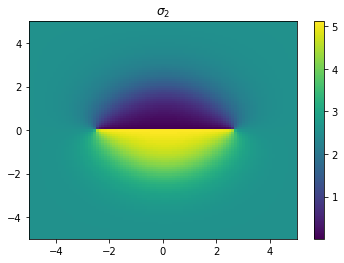

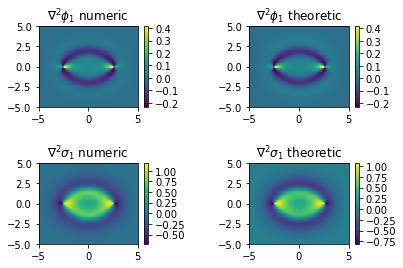

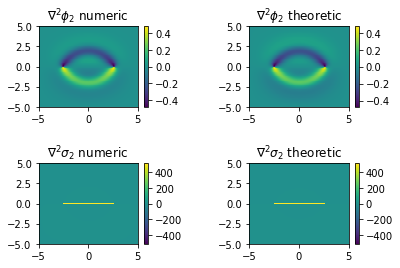

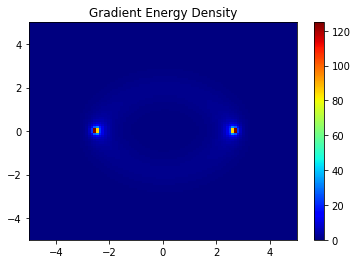

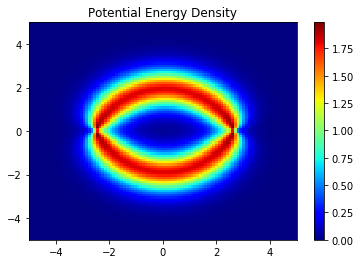

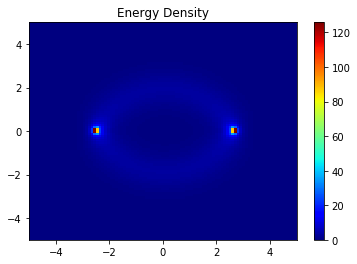

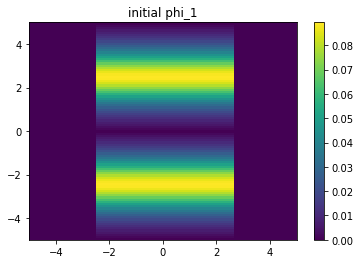

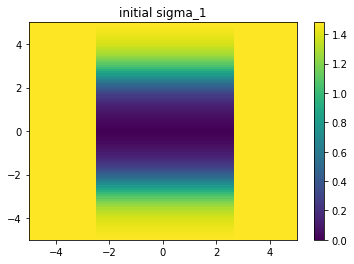

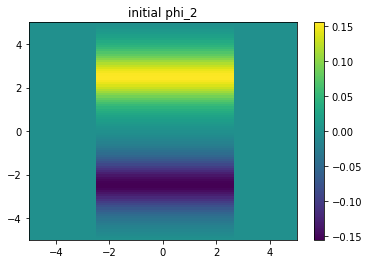

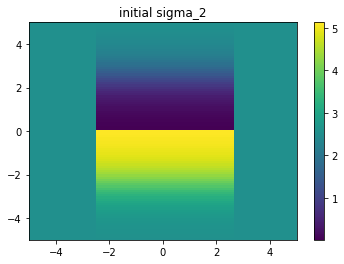

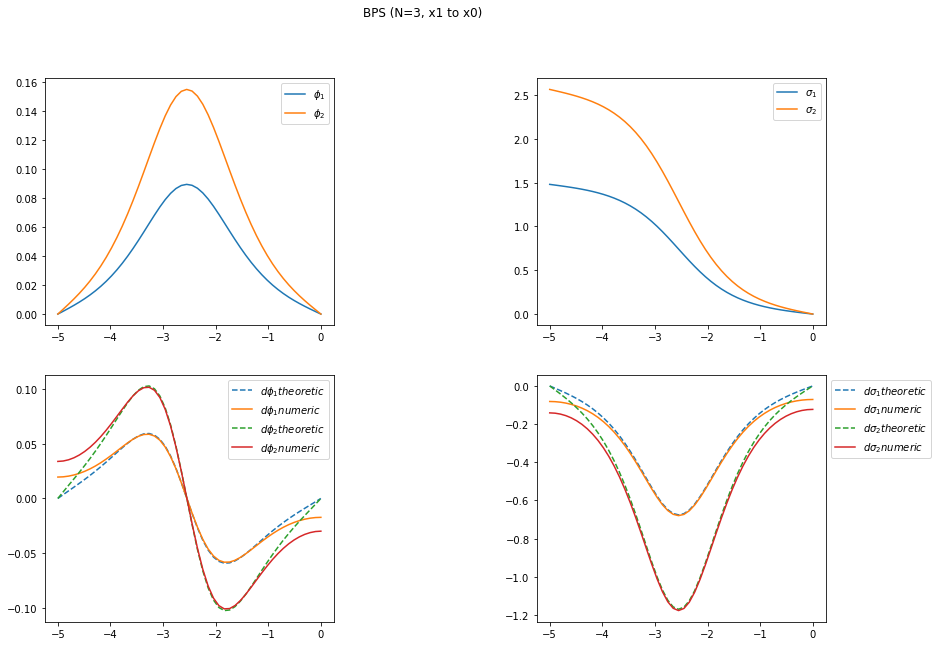

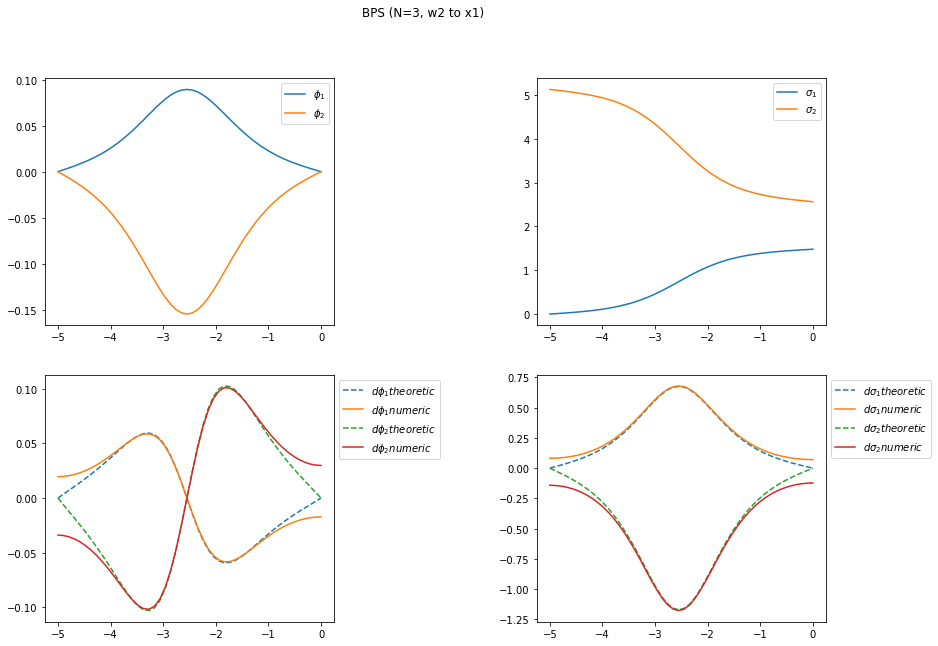

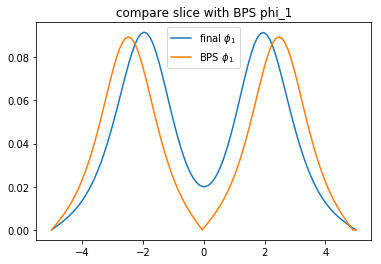

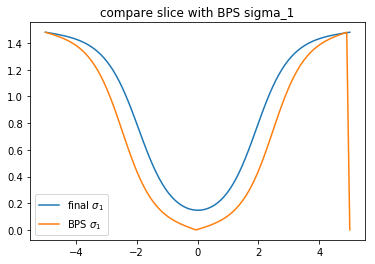

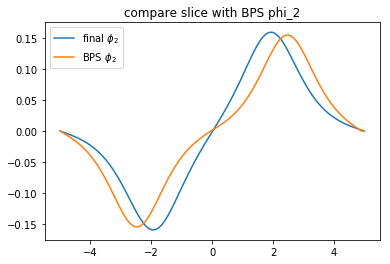

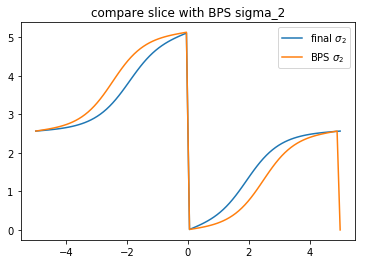

In [3]:
sol.display_all()

Next, run it on a half grid. In addition, I took out a lot of unnecessary time consuming parts such as plotting intermediate results and tolerance checking. Now it took only 18.4 seconds compared to the 41 seconds of the full grid and the 519 seconds it took before I embarked on this optimization mini-projects. It is definitely worth it. Also, the energy is 92.2, which is essentially the same as before, and the small discrepency is due to the one less/more column in the half grid recovery.

In [2]:
from Solver_Full_Grid import Solver
import time
start = time.time()
sol = Solver(N=3,charge_arg="w2",bound_arg="x1",L=10,w=10,h=0.1,R=5,max_loop=400,
             x0="BPS",half_grid=True,diagnose=True)
end = time.time()
print(end - start)

18.38657283782959



Attributes:
N = 3
charge_arg = w2
bound_arg = x1
max loop = 400
L = 10
w = 10
h = 0.1
R = 5
loop = 400
error = 0.00037868422897984096
energy = 92.23867990396857



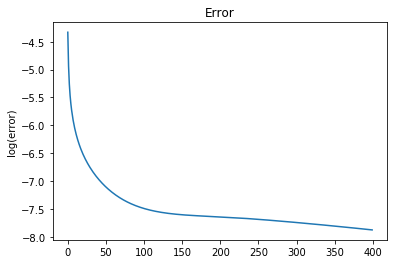

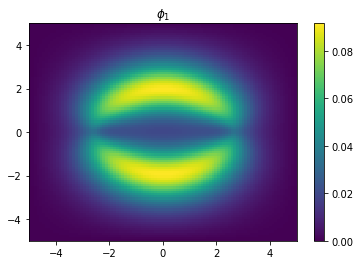

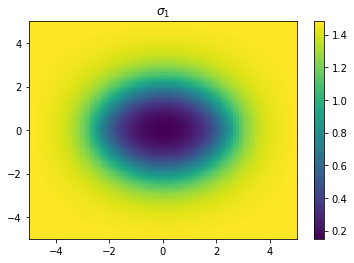

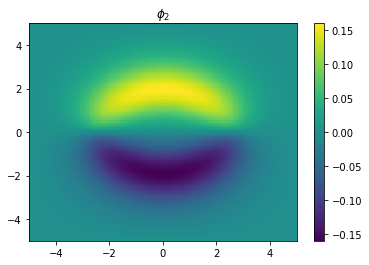

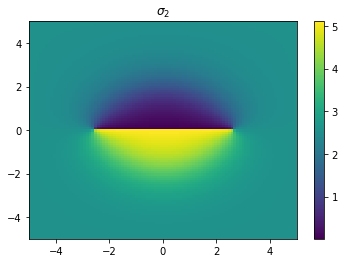

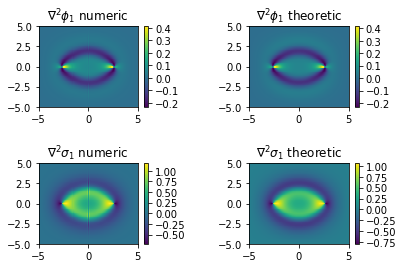

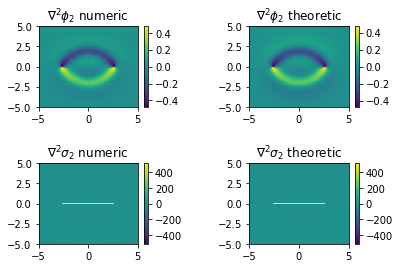

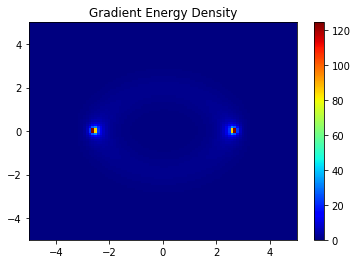

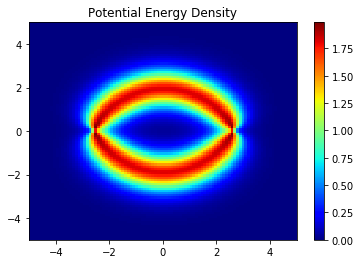

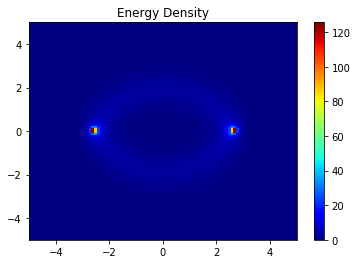

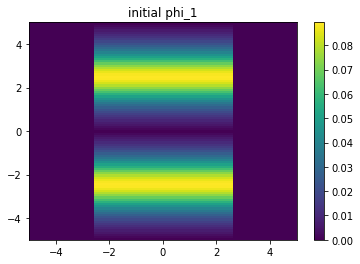

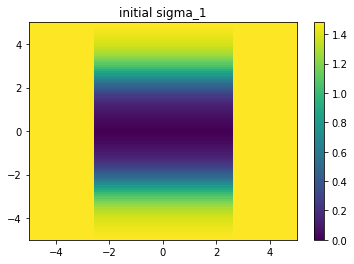

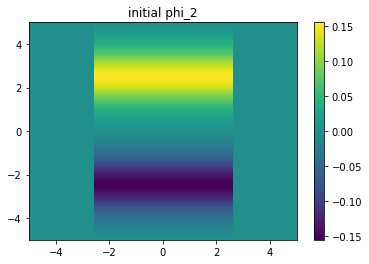

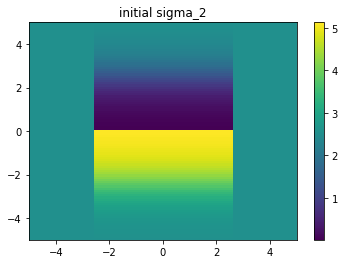

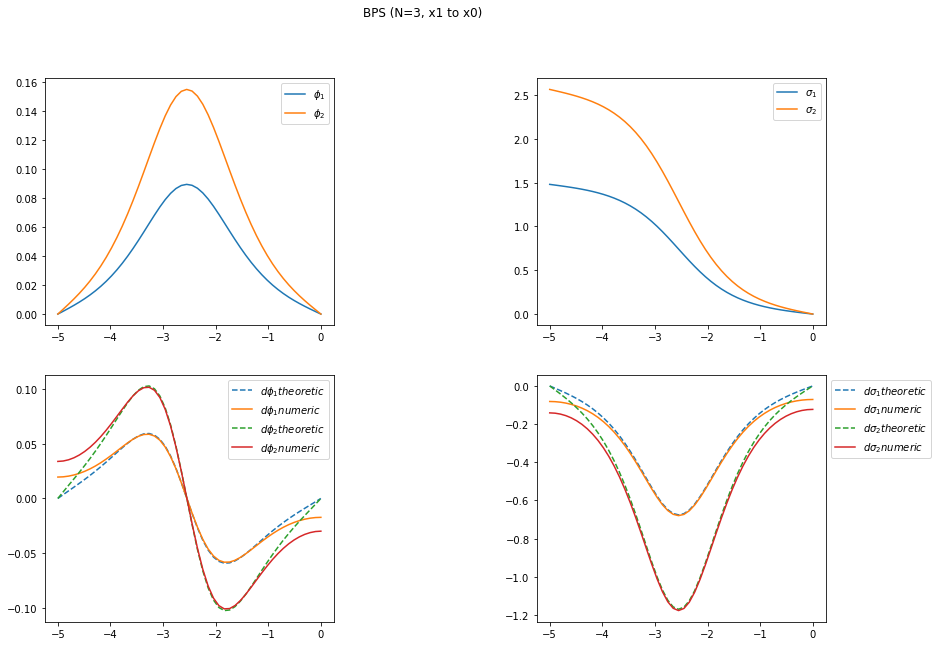

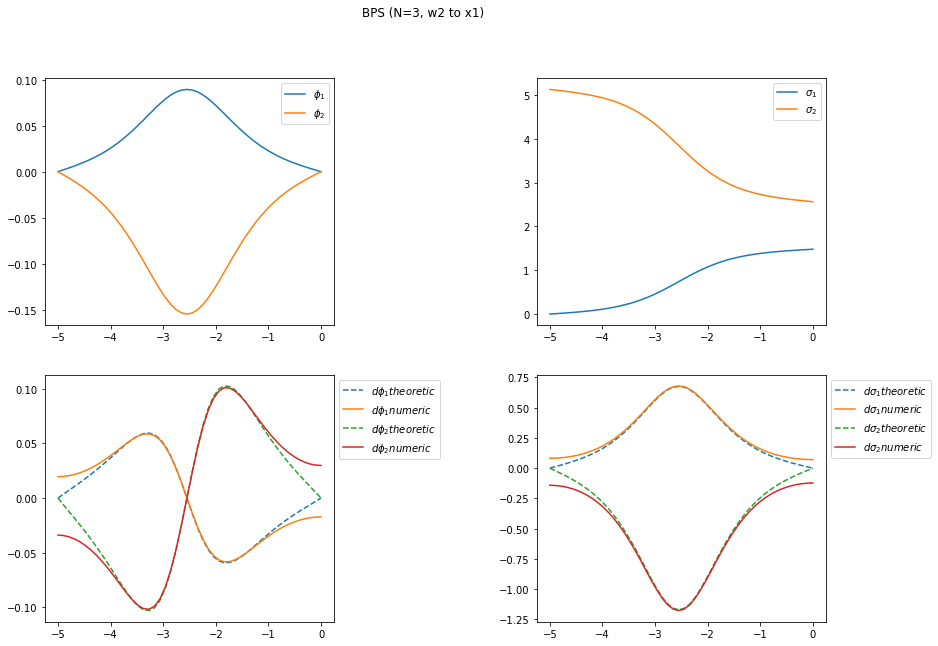

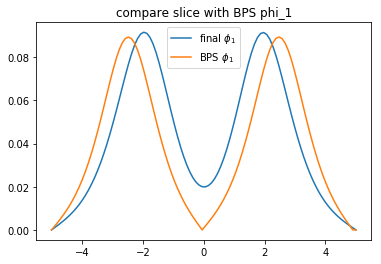

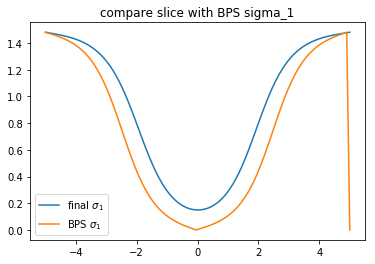

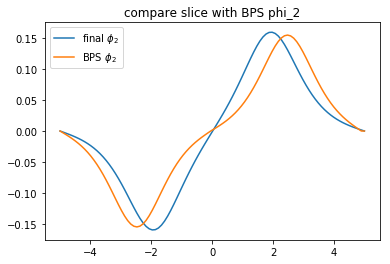

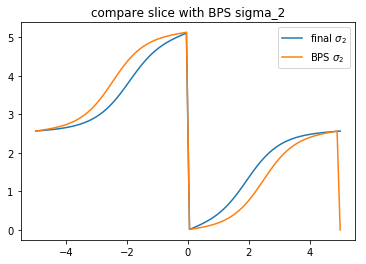

In [3]:
sol.display_all()